# Data Analysis using  Haberman Cancer Survival Dataset

Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Varibale/Feature Information: 
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
*The Age starts from 30

*A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

Class Information: 
1. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Total Data-Points= 305

Objective: TO perform EDA on the Dataset and then predict/classify if a patient can survive the surgery with data features matching our dataset. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv", names=['Age', 'Year', 'Nodes', 'Status'])

In [3]:
#Total Number of Data-Points and Features
print(haberman.shape)

(306, 4)


In [4]:
#Feature/Column/Variable Names
print(haberman.columns)

Index(['Age', 'Year', 'Nodes', 'Status'], dtype='object')


In [5]:
#Number of Data Points for each class
haberman['Status'].value_counts() 

#It is an imbalanced dataset

1    225
2     81
Name: Status, dtype: int64

PROBABILITY DENSITY FUNCTION:

C:\Users\shiba\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


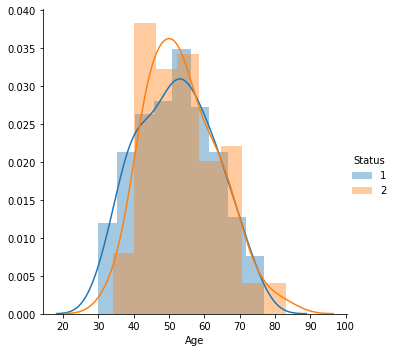

In [6]:
sns.FacetGrid(haberman, hue="Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

Observation:
1. It is difficult for us to actually determine since the classes overlap each other and there is no clear distinction from the above PDFs
2. Most of the people lie between the age 30-82
3. The percentage of people who survived and who didn't survive, based on the Age is almost the same.

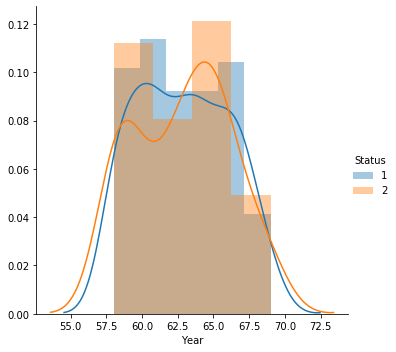

In [7]:
sns.FacetGrid(haberman, hue="Status", size=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.show();

Observation:
1. It is difficult for us to actually determine since the classes overlap each other and there is no clear distinction from the above PDFs
2. Most of the people got operated between the year 1958-1968.
3. The percentage of people who survived and who didn't, based on the Operation Year is almost the same.

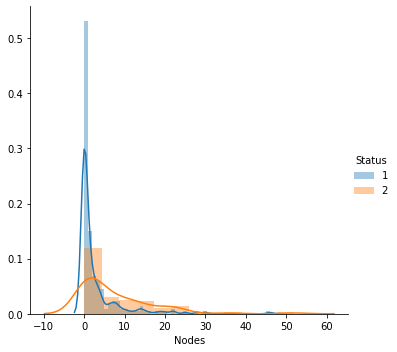

In [8]:
sns.FacetGrid(haberman, hue="Status", size=5) \
   .map(sns.distplot, "Nodes") \
   .add_legend();
plt.show();

Observation:
1. It is difficult for us to actually determine since the classes overlap each other and there is no clear distinction from the above PDFs
2. However we can say the about 53% people survived 5 years or longer and about 12% of people had actually died.
3. The least number of postitive node is 0 and the maximum lies in between 50-60

CDF(Cummulative Distributed Function):

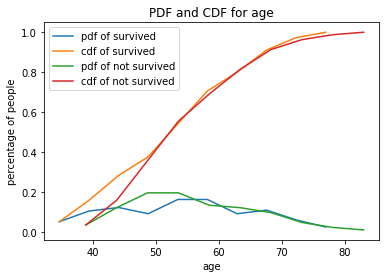

In [9]:
survived = haberman.loc[haberman["Status"] == 1]
not_survived = haberman.loc[haberman["Status"] == 2]
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts, bin_edges = np.histogram(survived['Age'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.title("PDF and CDF for age")
plt.xlabel("age")
plt.ylabel("percentage of people")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()



Observation:
1. Most of the people below the age of 40 had survived.
2. After the age of 50 the percentage of person's surviving and not surviving were almost the same
3. About 16% of people below the age 38 had survived

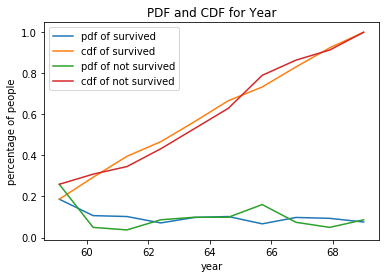

In [10]:
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts, bin_edges = np.histogram(survived['Year'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.title("PDF and CDF for Year")
plt.xlabel("year")
plt.ylabel("percentage of people")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['Year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


Observation:
1. The percentage of person's who survived was less than the percentage of person's who didn't before 1960
2. The percentage of person's who survived was more than the percentage of person's who didn't from year 1961-1965
3. The percentage of person's who survived was less than the percentage of person's who didn't before 1965- 1967
4. The percentage of people were simillar after 1968

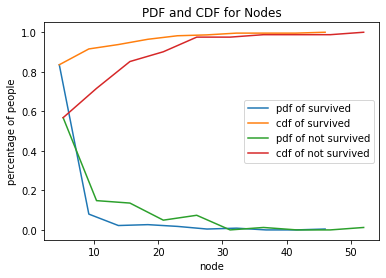

In [11]:
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts, bin_edges = np.histogram(survived['Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.title("PDF and CDF for Nodes")
plt.xlabel("node")
plt.ylabel("percentage of people")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


Observation:
1. People who have more than 46 nodes removed didnot survive. 
2. The percentage of survival was more for people who had their nodes removed from the numbers 8-28

BOX PLOT:

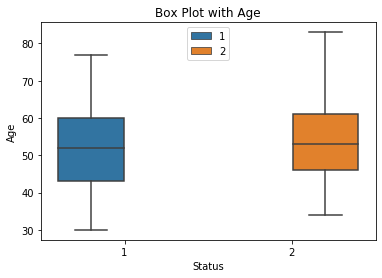

In [40]:
sns.boxplot(x='Status',y='Age', hue="Status", data=haberman)
plt.title('Box Plot with Age')
plt.legend(loc='upper center')
plt.show()

Observation:
1. The 50th and 75th percentile of both the people who survived and who didn't survive are almost the same.
2. The people who survived are mostly in the range of 30-75
3. The people who didn't survive are mostly in the range of 35-85

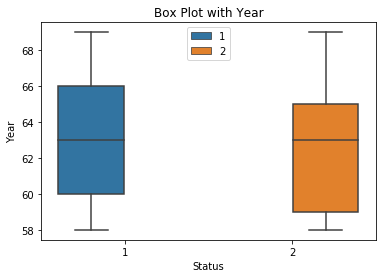

In [41]:
sns.boxplot(x='Status',y='Year', hue="Status", data=haberman)
plt.title('Box Plot with Year')
plt.legend(loc='upper center')
plt.show()

Observation:
1. The 50th percentile of both the people who survived and who didn't survive are almost the same.
2. 25th percentile of people didn't survive in the year 1959


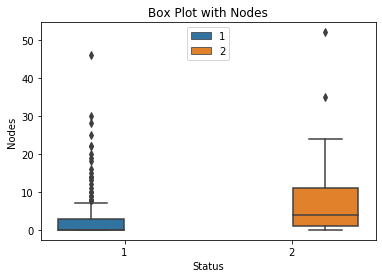

In [42]:
sns.boxplot(x='Status',y='Nodes', hue="Status", data=haberman)
plt.title('Box Plot with Nodes')
plt.legend(loc='upper center')
plt.show()

Observation:
1. This plot is not suitable

VIOLIN PLOTS:

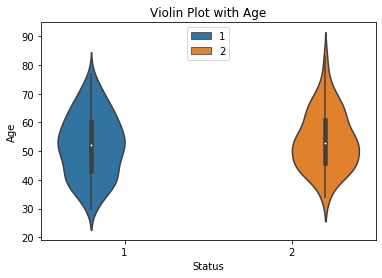

In [43]:
sns.violinplot(x='Status', y='Age', hue='Status', data=haberman, size=8)
plt.title('Violin Plot with Age')
plt.legend(loc='upper center')
plt.show()

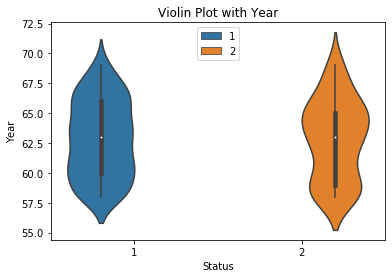

In [44]:
sns.violinplot(x='Status', y='Year', hue='Status', data=haberman, size=8)
plt.title('Violin Plot with Year')
plt.legend(loc='upper center')
plt.show()

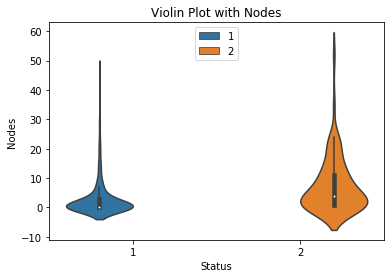

In [45]:
sns.violinplot(x='Status', y='Nodes', hue='Status', data=haberman, size=8)
plt.title('Violin Plot with Nodes')
plt.legend(loc='upper center')
plt.show()

Observation:
1. The plot with node is not clear.
2. The decrease in the number of people who didn't survive based on Age from the age of 50 is more than people who survived
3. The range of people who survived from the year 1958-1966 is uniform.  

1-D SCATTER PLOT:

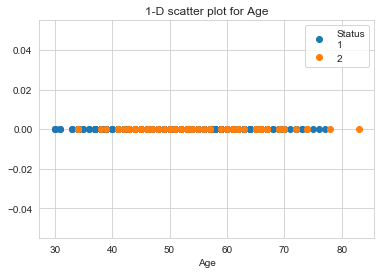

In [50]:
survived = haberman.loc[haberman["Status"] == 1]
not_survived = haberman.loc[haberman["Status"] == 2]
plt.plot(survived["Age"], np.zeros_like(survived["Age"]), 'o', label = "Status\n" "1")
plt.plot(not_survived["Age"], np.zeros_like(not_survived["Age"]), 'o', label = "2")
plt.title("1-D scatter plot for Age")
plt.xlabel("Age")
plt.legend()
plt.show()

Observation:
1. There is a lot of overlap between the person who survived and who didn't survive.
2. Most of the people survived below the age 38

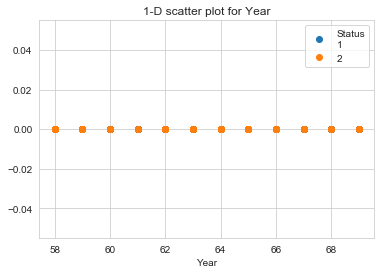

In [75]:
survived = haberman.loc[haberman["Status"] == 1]
not_survived = haberman.loc[haberman["Status"] == 2]
plt.plot(survived["Year"], np.zeros_like(survived["Year"]), 'o', label = "Status\n" "1")
plt.plot(not_survived["Year"], np.zeros_like(not_survived["Year"]), 'o', label = "2")
plt.title("1-D scatter plot for Year")
plt.xlabel("Year")
plt.legend()
plt.show()

Observation:
Absolutely no information.

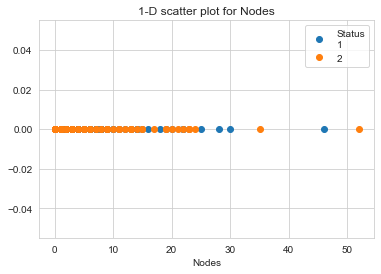

In [76]:
survived = haberman.loc[haberman["Status"] == 1]
not_survived = haberman.loc[haberman["Status"] == 2]
plt.plot(survived["Nodes"], np.zeros_like(survived["Nodes"]), 'o', label = "Status\n" "1")
plt.plot(not_survived["Nodes"], np.zeros_like(not_survived["Nodes"]), 'o', label = "2")
plt.title("1-D scatter plot for Nodes")
plt.xlabel("Nodes")
plt.legend()
plt.show()

Observation:
Too much overlap

BI-VARIATE ANALYSIS:

2D-SCATTER PLOT:

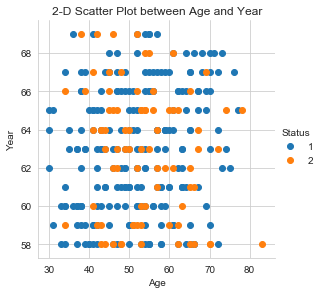

In [52]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Status", size=4) \
   .map(plt.scatter, "Age", "Year") \
   .add_legend()
plt.title('2-D Scatter Plot between Age and Year')
plt.show()

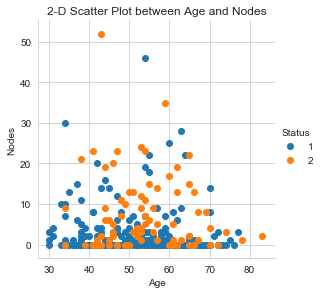

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Status", size=4) \
   .map(plt.scatter, "Age", "Nodes") \
   .add_legend()
plt.title('2-D Scatter Plot between Age and Nodes')
plt.show()

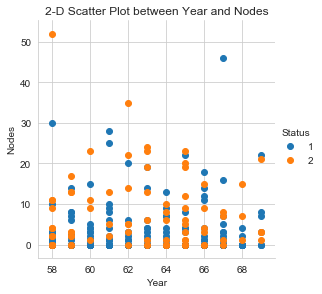

In [58]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Status", size=4) \
   .map(plt.scatter, "Year", "Nodes") \
   .add_legend()
plt.title('2-D Scatter Plot between Year and Nodes')
plt.show()

Observation: 
1. There is a lot of overlap
2. The plot between Age and Year gives us better information
3. It is clear that most people below age 38 survived
4. In 1961, everyone below age 58 survived

PAIR-PLOT

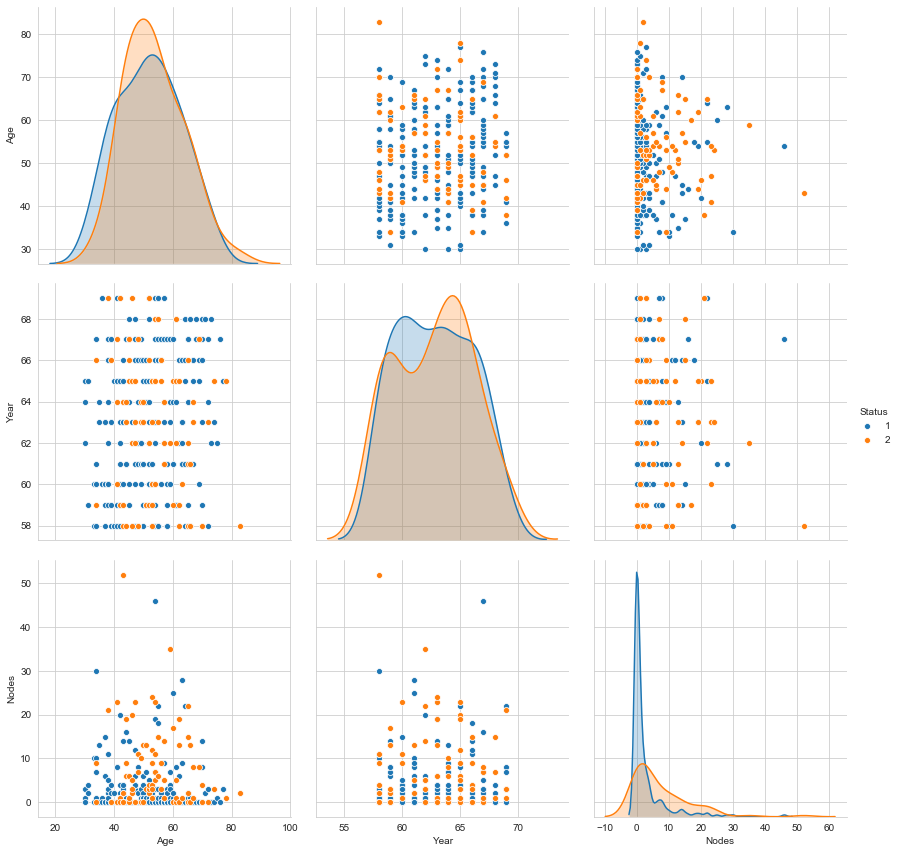

In [72]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Status", vars= ['Age','Year','Nodes'], size=4);
plt.show()

Observation: 
1. There is a lot of overlapping.
2. This is not a suitable plot
3. The plot between Age and Year is less overlapping

Conclusion:
1. It is an imbalanced Dataset
2. We cannot use a simple model to derive results from this Dataset
3. There is too much overlap and hence we cannot classify the classes
4. However, the number of Nodes is the most important characteristic. We can say that the more the number of nodes removed, the less the chances of survival.